# **FINAL PROJECTS 2 - PHASE 2**

<hr>

## **2. Import Libraries**

In [312]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
import pickle
import tensorflow as tf
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dense, Dropout, Activation, Flatten, GRU
from keras import optimizers
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import mplfinance as fplt

pd.options.mode.chained_assignment = None

In [313]:
colors = sns.color_palette("Set2")
colors2 = sns.color_palette("Paired")
sns.set_style("whitegrid")
plt.style.use('seaborn-pastel')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

## **3. Data Loading**

### 3.1. Data Loading

In [314]:
df = pd.read_csv('historical_prices/BTCUSDT_1h_2021_2022.csv', index_col=0)

In [315]:
df_sentiment = pd.read_csv('dataset/sampling_impact_score_all.csv', index_col=0)

In [316]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1612137600000,33092.97,33106.33,32296.16,32546.27,4383.926122,1612141199999,1.427372e+08,98763,2074.600069,6.750233e+07,0
1,1612141200000,32546.32,33560.90,32476.34,33430.29,3713.649492,1612144799999,1.229016e+08,76863,1958.691774,6.482048e+07,0
2,1612144800000,33425.19,33830.00,33222.88,33649.73,3694.931629,1612148399999,1.241016e+08,70196,2026.270613,6.804863e+07,0
3,1612148400000,33646.37,33776.81,33470.00,33573.97,2882.141795,1612151999999,9.689886e+07,65467,1502.164716,5.050666e+07,0
4,1612152000000,33573.25,33943.55,33423.43,33558.25,3206.054328,1612155599999,1.079852e+08,82376,1739.632601,5.861244e+07,0


In [317]:
df_sentiment.head()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg,impact_score_tb_avg
0,2021-04-07 12:03:04,Bitcoin price crash: Cryptocurrency plunges in...,879107.0,True,bitcoin price crash cryptocurrency plunges in ...,"{'neg': 0.338, 'neu': 0.493, 'pos': 0.169, 'co...",-0.3400,0.000000,13.888084,-4.721949,0.000000,5.8237,0.693484,0.556068
1,2021-04-07 10:03:34,The #BTC is stuck inside a large range between...,81172.0,True,the is stuck inside a large range between and ...,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.2500,0.107143,11.818823,-2.954706,1.266302,5.8237,0.693484,0.556068
2,2021-04-07 09:42:48,Price data of #Bitcoin #BTC pairs on #btcturkp...,90749.0,True,price data of pairs on trade bitcoin and crypt...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.100000,11.915693,0.000000,1.191569,5.8237,0.693484,0.556068
3,2021-04-07 05:37:45,#WhatsApp rival #Signal reportedly testing pee...,69095.0,True,rival reportedly testing peer to peer payment...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,0.000000,11.678906,0.000000,0.000000,5.8237,0.693484,0.556068
4,2021-04-07 04:44:25,"When supply is more than demand, what happens?...",147300.0,True,when supply is more than demand what happens i...,"{'neg': 0.081, 'neu': 0.728, 'pos': 0.191, 'co...",0.5302,0.750000,12.336411,6.540765,9.252309,5.8237,0.693484,0.556068


### 3.2. Rename Columns

In [318]:
df= df.rename(columns={'0': 'open_time', '1':'open', '2':'high', '3':'low', '4':'close', '5':'volume', '6': 'close_time', '7': 'quote_asset_volume', '8': 'number_of_trades', '9': 'taker_buy_asset_volume', '10': 'taker_buy_quote_asset_volume', '11': 'ignore'})

## **4. Exploratory Data Analysis**

## **5. Data Preprocessing**

In [319]:
df['MA5'] = df['close'].rolling(window=5).mean()

In [320]:
# df = df.loc[:, ['close', 'MA5']]

In [321]:
df['open_time_conv'] = pd.to_datetime(df['open_time'], unit='ms')

In [322]:
df_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30793 entries, 0 to 31256
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  30793 non-null  object 
 1   text                  30793 non-null  object 
 2   user_followers        30793 non-null  float64
 3   user_verified         30793 non-null  bool   
 4   cleaned_text          30793 non-null  object 
 5   vader                 30793 non-null  object 
 6   compound              30793 non-null  float64
 7   polarity              30793 non-null  float64
 8   impact_score_only     30793 non-null  float64
 9   impact_score_var      30793 non-null  float64
 10  impact_score_tb       30793 non-null  float64
 11  impact_score_avg      30793 non-null  float64
 12  impact_score_var_avg  30793 non-null  float64
 13  impact_score_tb_avg   30793 non-null  float64
dtypes: bool(1), float64(9), object(4)
memory usage: 3.3+ MB


In [323]:
df_sentiment['date'] = pd.to_datetime(df_sentiment['date'])

In [324]:
df_sentiment.groupby(df_sentiment['date'].dt.date).count()

,date,text,user_followers,user_verified,cleaned_text,vader,compound,polarity,impact_score_only,impact_score_var,impact_score_tb,impact_score_avg,impact_score_var_avg,impact_score_tb_avg
date,,,,,,,,,,,,,,
2021-02-05,98,98,98,98,98,98,98,98,98,98,98,98,98,98
2021-02-06,105,105,105,105,105,105,105,105,105,105,105,105,105,105
2021-02-07,115,115,115,115,115,115,115,115,115,115,115,115,115,115
2021-02-08,116,116,116,116,116,116,116,116,116,116,116,116,116,116
2021-02-09,103,103,103,103,103,103,103,103,103,103,103,103,103,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-15,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2022-03-16,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2022-03-17,164,164,164,164,164,164,164,164,164,164,164,164,164,164


In [325]:
df_sentiment['days'] = pd.to_datetime(df_sentiment['date']).dt.date

In [326]:
df_sentiment_avg = df_sentiment.drop_duplicates(subset='days', keep='first')

In [327]:
df.groupby(df['open_time_conv'].dt.date).count()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_asset_volume,ignore,MA5,open_time_conv
open_time_conv,,,,,,,,,,,,,,
2021-02-01,24,24,24,24,24,24,24,24,24,24,24,24,20,24
2021-02-02,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2021-02-03,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2021-02-04,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2021-02-05,24,24,24,24,24,24,24,24,24,24,24,24,24,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2022-03-29,24,24,24,24,24,24,24,24,24,24,24,24,24,24
2022-03-30,24,24,24,24,24,24,24,24,24,24,24,24,24,24


In [328]:
daterange = pd.date_range("2021-02-05", "2022-03-19")

In [329]:
for date in daterange:
    if date not in df_sentiment_avg['days'].values:
        df_sentiment_avg = df_sentiment_avg.append({'days': date, 'impact_score_var_avg': 0, 'impact_score_tb_avg': 0}, ignore_index=True)

In [330]:
df_sentiment_avg = df_sentiment_avg[['impact_score_var_avg', 'impact_score_tb_avg', 'days']]
df_sentiment_avg['days'] = pd.to_datetime(df_sentiment_avg['days']).dt.date

In [331]:
df_sentiment_avg.sort_values(by='days', inplace=True)
df_sentiment_avg.reset_index(drop=True, inplace=True)

In [332]:
df_sentiment_avg = df_sentiment_avg.sort_values(by='days')
df_sentiment_avg.reset_index(drop=True, inplace=True)

In [333]:
df_merge = df.copy()
df_merge['days'] = pd.to_datetime(df_merge['open_time_conv']).dt.date

In [334]:
df_merge = df_merge.merge(df_sentiment_avg, on='days', how='left')

In [335]:
df_merge.dropna(inplace=True)

In [336]:
df_merge

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_asset_volume,taker_buy_quote_asset_volume,ignore,MA5,open_time_conv,days,impact_score_var_avg,impact_score_tb_avg
96,1612483200000,36936.65,37227.22,36795.72,36993.25,2538.982425,1612486799999,9.406054e+07,66150,1370.475025,5.078107e+07,0,37285.244,2021-02-05 00:00:00,2021-02-05,1.070502,0.758567
97,1612486800000,36993.25,37300.00,36570.00,36632.38,2618.349898,1612490399999,9.691924e+07,65505,1214.699360,4.498659e+07,0,37089.058,2021-02-05 01:00:00,2021-02-05,1.070502,0.758567
98,1612490400000,36632.38,36990.00,36570.00,36958.28,2861.360001,1612493999999,1.052216e+08,66191,1351.233826,4.968679e+07,0,36952.114,2021-02-05 02:00:00,2021-02-05,1.070502,0.758567
99,1612494000000,36958.33,37400.00,36909.71,37366.02,2614.237210,1612497599999,9.733176e+07,68270,1382.645039,5.148348e+07,0,36977.318,2021-02-05 03:00:00,2021-02-05,1.070502,0.758567
100,1612497600000,37366.01,37499.00,37187.81,37266.78,1902.890739,1612501199999,7.099173e+07,54835,998.866607,3.726447e+07,0,37043.342,2021-02-05 04:00:00,2021-02-05,1.070502,0.758567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9870,1647716400000,42010.00,42092.49,41912.00,42034.88,1120.037140,1647719999999,4.704134e+07,27940,594.264380,2.496002e+07,0,41969.768,2022-03-19 19:00:00,2022-03-19,1.902353,1.247385
9871,1647720000000,42034.87,42400.00,41895.98,42191.28,1678.807380,1647723599999,7.080695e+07,48331,951.341400,4.013007e+07,0,42020.488,2022-03-19 20:00:00,2022-03-19,1.902353,1.247385
9872,1647723600000,42191.28,42359.15,42096.09,42115.73,775.167240,1647727199999,3.275074e+07,28954,377.016880,1.592884e+07,0,42048.262,2022-03-19 21:00:00,2022-03-19,1.902353,1.247385
9873,1647727200000,42115.73,42145.31,41715.43,41954.53,1836.479140,1647730799999,7.689435e+07,48151,850.568720,3.561472e+07,0,42061.284,2022-03-19 22:00:00,2022-03-19,1.902353,1.247385


### 5.1. Split Dataset

In [337]:
# Split data into train and test

train_data_length = len(df_merge) - 168

data_train = df_merge.iloc[:train_data_length]
X_test = df_merge.iloc[train_data_length:]

In [338]:
# Split train set into train and validation

train_data_length = math.ceil(data_train.shape[0] * 0.9)

X_train = data_train.iloc[:train_data_length]
X_val = data_train.iloc[train_data_length:]

### 5.2. Drop First NaN

In [339]:
X_train.dropna(inplace=True)

### 5.3. Feature Selection

In [340]:
X_train_selected = X_train.loc[:, ['close', 'MA5', 'impact_score_var_avg'] ]
X_val_selected = X_val.loc[:, ['close', 'MA5', 'impact_score_var_avg'] ]
X_test_selected = X_test.loc[:, ['close', 'MA5', 'impact_score_var_avg'] ]

### 5.4. Feature Scaling

In [341]:
scaler = RobustScaler()
scaler.fit(X_train_selected)

X_train_scaled = scaler.transform(X_train_selected)
X_val_scaled = scaler.transform(X_val_selected)
X_test_scaled = scaler.transform(X_test_selected)

### 5.5. Feature Extraction

#### 5.5.1. Add Time Steps Into Features

In [342]:
sequence_length = 5

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]

    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i, :]) 
        y.append(data[i, 0]) 
    
    x = np.array(x)
    y = np.array(y)
    return x, y
    

In [343]:
X_train_final, y_train = partition_dataset(sequence_length, X_train_scaled)
X_val_final, y_val = partition_dataset(sequence_length, X_val_scaled)
X_test_final, y_test = partition_dataset(sequence_length, X_test_scaled)

#### 5.5.2. Distribution Shape Check

In [344]:
print(X_train_final.shape, y_train.shape, X_test_final.shape, y_test.shape)

(8645, 5, 3) (8645,) (163, 5, 3) (163,)


## **6. Build Model**

In [346]:
base_model = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# Model

base_model.add(layers.SimpleRNN(15, return_sequences=True, input_shape=(X_train_final.shape[1], X_train_final.shape[2])))
base_model.add(layers.SimpleRNN(2, return_sequences=True))
base_model.add(layers.SimpleRNN(1))
 
# Hyperparameters
optimizer='adam'; loss='mean_squared_error'; epochs = 30; batch_size = 128; patience = 6;

base_model.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

# early_stop = EarlyStopping(monitor='loss', 
#                            patience=patience, 
#                            verbose=0)

base_model.summary()

timesteps: 5, features: 3, neurons: 15
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_6 (SimpleRNN)    (None, 5, 15)             285       
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 5, 2)              36        
                                                                 
 simple_rnn_8 (SimpleRNN)    (None, 1)                 4         
                                                                 
Total params: 325
Trainable params: 325
Non-trainable params: 0
_________________________________________________________________


In [347]:
parameter_list = ['epochs: ' + str(epochs), 'batch_size: ' + str(batch_size), 'patience: ' + str(patience), 'optimizer: ' + str(optimizer), 'loss: ' + str(loss)]
print('Parameters: ' + str(parameter_list))

Parameters: ['epochs: 30', 'batch_size: 128', 'patience: 6', 'optimizer: adam', 'loss: mean_squared_error']


In [348]:
base_model_hist = base_model.fit(
                    X_train_final,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=[X_val_final, y_val],
                    verbose=1
                )

Epoch 1/30


2022-04-04 21:04:02.846063: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 0.1008 - mean_squared_error: 0.1008

2022-04-04 21:04:08.280718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 6s 68ms/step - loss: 0.1008 - mean_squared_error: 0.1008 - val_loss: 0.0166 - val_mean_squared_error: 0.0166
Epoch 2/30
68/68 [==============================] - 4s 61ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 3/30
68/68 [==============================] - 4s 59ms/step - loss: 0.0129 - mean_squared_error: 0.0129 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 4/30
68/68 [==============================] - 4s 63ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 5/30
68/68 [==============================] - 4s 62ms/step - loss: 0.0098 - mean_squared_error: 0.0098 - val_loss: 0.0056 - val_mean_squared_error: 0.0056
Epoch 6/30
68/68 [==============================] - 4s 62ms/step - loss: 0.0088 - mean_squared_error: 0.0088 - val_loss: 0.0051 - val_mean_squared_error: 0.0051
Epoch 7/30
68/68 [===========================

## **7. Base Model Evaluation**

### 7.1. Create Baseline Evaluation

In [349]:
evaluation_metrics = pd.DataFrame({'Model':[], 'Details' : [], 'MSE': [], 'RMSE': [], 'MAE(Test)': [], 'MAPE(Test)': [], 'Real MAE(Test)': []})
# evaluation_metrics.style.format({'RMSE(Test)': '{:.2f} $'})

In [350]:
y_pred_base = X_val_final[: -1, :, 0]
y_pred_test = X_test_final[: -1, :, 0]
# y_pred_test = scaler.inverse_transform(y_pred_test.reshape)
y_pred_base = y_pred_base.reshape(y_pred_base.shape[0], y_pred_base.shape[1], 1)
y_pred_test = y_pred_test.reshape(y_pred_test.shape[0], y_pred_test.shape[1], 1)
# calculate mse and rmse
mse_last_value = np.mean(tf.keras.losses.mean_squared_error(y_val, y_pred_base))
rmse_last_value = np.sqrt(mse_last_value)
mae_last_value_test = np.mean(tf.keras.metrics.mean_absolute_error(y_test, y_pred_test))

# calculate MAE of real price
y_test_reshape = y_test.reshape(-1, 1)
y_test_real = np.concatenate([y_test_reshape, y_test_reshape, y_test_reshape], axis=1)
y_test_real = scaler.inverse_transform(y_test_real)
y_test_real = y_test_real[:, 0]

y_pred_test_real = y_pred_test.reshape(-1, 1)
y_pred_test_real = np.concatenate([y_pred_test_real, y_pred_test_real, y_pred_test_real], axis=1)
y_pred_test_real = scaler.inverse_transform(y_pred_test_real)
y_pred_test_real = y_pred_test_real[:, 0]
y_pred_test_real = y_pred_test_real.reshape(162, 5, 1)
mape_last_value_test = np.mean(tf.keras.metrics.mean_absolute_percentage_error(y_test, y_pred_test))
real_mae_last_value_test = np.mean(np.abs(y_test_real - y_pred_test_real))
evaluation_metrics.loc[0] = ['Naive Forecasting', 'Difference of Last Value in X val with y val', mse_last_value, rmse_last_value, mae_last_value_test, mape_last_value_test, real_mae_last_value_test]

In [351]:
evaluation_metrics

,Model,Details,MSE,RMSE,MAE(Test),MAPE(Test),Real MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.046962,0.216708,0.087265,18.134498,1375.458725


### 7.2. Base Model Evaluation

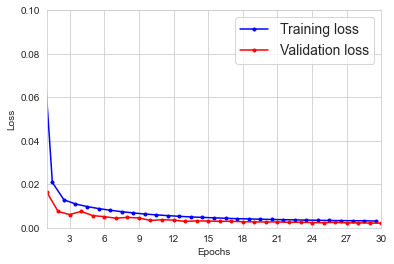

In [352]:
# Visualization of Training Loss and Validation Loss

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, epochs, 0, 0.1])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

plot_learning_curves(base_model_hist.history["loss"], base_model_hist.history["val_loss"])
plt.show()

In [353]:
mse_base_deep_rnn = base_model.evaluate(X_val_final, y_val)
rmse_base_deep_rnn = np.sqrt(mse_base_deep_rnn)

30/30 [==============================] - 1s 14ms/step - loss: 0.0021 - mean_squared_error: 0.0021


In [354]:
y_pred_test_base = base_model.predict(X_test_final)
mae_base_deep_rnn_test = mean_absolute_error(y_test, y_pred_test_base)

# MAE of real price
y_pred_test_base_real = np.concatenate([y_pred_test_base, y_pred_test_base, y_pred_test_base], axis=1)
y_pred_test_base_real = scaler.inverse_transform(y_pred_test_base_real)
y_pred_test_base_real = y_pred_test_base_real[:, 0]

mape_base_deep_rnn_test = np.mean(np.mean(np.abs(y_test_real - y_pred_test_base_real)/y_test_real)*100)
real_mae_base_deep_rnn_test = mean_absolute_error(y_test_real, y_pred_test_base_real)
evaluation_metrics.loc[1] = ['Base Deep RNN', 'Neuron=5, Timestep=5, Epoch=35, Multi Layers', mse_base_deep_rnn[0], rmse_base_deep_rnn[0], mae_base_deep_rnn_test, mape_base_deep_rnn_test, real_mae_base_deep_rnn_test]
evaluation_metrics

2022-04-04 21:06:11.927016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Model,Details,MSE,RMSE,MAE(Test),MAPE(Test),Real MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.046962,0.216708,0.087265,18.134498,1375.458725
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002134,0.046200,0.038006,1.499057,599.042514


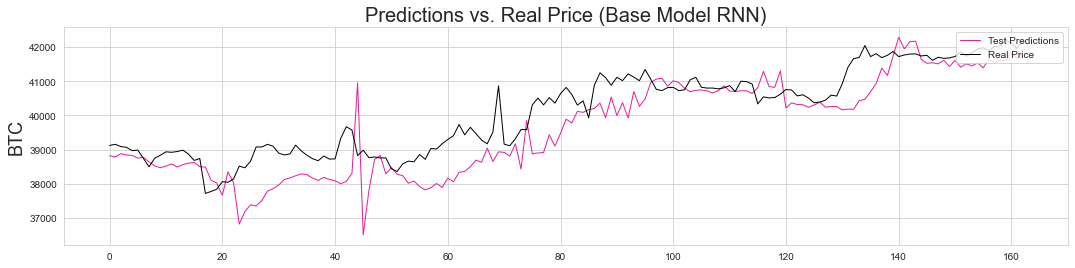

In [355]:
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (Base Model RNN)", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_test_base_real, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")

# valid.loc[valid["Difference"] >= 0, 'diff_color'] = "#2BC97A"
# valid.loc[valid["Difference"] < 0, 'diff_color'] = "#C92B2B"
# plt.bar(valid.index, valid["Difference"], width=0.8, color=valid['diff_color'])

plt.show()

## **8. Model Improvement**

### 8.1. LSTM 

In [431]:
lstm_imp_model_2 = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# The lstm_imp_model_2
lstm_imp_model_2.add(LSTM(12, return_sequences=True, input_shape=(None, X_train_final.shape[2]))) 
lstm_imp_model_2.add(LSTM(2))
lstm_imp_model_2.add(Dense(1, activation='linear'))

# Hyperparameters
optimizer='adam'; loss='mean_squared_error'; epochs = 75; patience = 6;
parameter_list = ['epochs ' + str(epochs), 'batch_size ' + str(batch_size), 'patience ' + str(patience), 'optimizer ' + str(optimizer), 'loss ' + str(loss)]
print('Parameters: ' + str(parameter_list))

lstm_imp_model_2.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

lstm_imp_model_2.summary()

timesteps: 5, features: 3, neurons: 15
Parameters: ['epochs 75', 'batch_size 128', 'patience 6', 'optimizer adam', 'loss mean_squared_error']
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, None, 12)          768       
                                                                 
 lstm_15 (LSTM)              (None, 2)                 120       
                                                                 
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 891
Trainable params: 891
Non-trainable params: 0
_________________________________________________________________


In [432]:
lstm_imp_model_hist_2 = lstm_imp_model_2.fit(
                    X_train_final,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_final, y_val),
                    verbose=0
                )

2022-04-04 21:26:03.703889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:26:04.282940: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:26:04.565293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:26:05.677549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:26:06.286996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:26:09.432718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:26:09.551418: I tensorflow/core/grappler/optimizers/cust

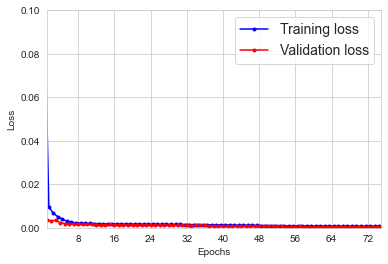

In [433]:
# Visualization of Training Loss and Validation Loss

plot_learning_curves(lstm_imp_model_hist_2.history["loss"], lstm_imp_model_hist_2.history["val_loss"])
plt.show()

In [434]:
mse_lstm_imp_rnn_2 = lstm_imp_model_2.evaluate(X_val_final, y_val)
rmse_lstm_imp_rnn_2 = np.sqrt(mse_lstm_imp_rnn_2)

30/30 [==============================] - 0s 8ms/step - loss: 4.1817e-04 - mean_squared_error: 4.1817e-04


In [435]:
y_pred_lstm_non = lstm_imp_model_2.predict(X_test_final)
mae_lstm_imp_rnn_2_test = mean_absolute_error(y_test, y_pred_lstm_non)

# MAE of real price
y_pred_lstm_non_real = np.concatenate([y_pred_lstm_non, y_pred_lstm_non, y_pred_lstm_non], axis=1)
y_pred_lstm_non_real = scaler.inverse_transform(y_pred_lstm_non_real)
y_pred_lstm_non_real = y_pred_lstm_non_real[:, 0]

mape_pred_imp_rnn_2 = np.mean(np.mean(np.abs(y_test_real - y_pred_lstm_non_real)/y_test_real)*100)
real_mae_pred_imp_rnn_2 = mean_absolute_error(y_test_real, y_pred_lstm_non_real)
evaluation_metrics.loc[2] = ['LSTM - Non-Pipeline Dataset', 'Without tensorflow pipeline dataset. The rest is same', mse_lstm_imp_rnn_2[0], rmse_lstm_imp_rnn_2[0], mae_lstm_imp_rnn_2_test, mape_pred_imp_rnn_2, real_mae_pred_imp_rnn_2]
evaluation_metrics

2022-04-04 21:27:00.461588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:00.539016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:00.581444: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Model,Details,MSE,RMSE,MAE(Test),MAPE(Test),Real MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.046962,0.216708,0.087265,18.134498,1375.458725
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002134,0.046200,0.038006,1.499057,599.042514
2,LSTM - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.000418,0.020449,0.011832,0.467323,186.490561
3,GRU - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.000876,0.029594,0.014113,0.557374,222.443499
4,LSTM - 24 Sequence Length,"Timestep=50, without tensorflow pipeline datas...",0.000795,0.028201,0.015470,0.602620,243.836369


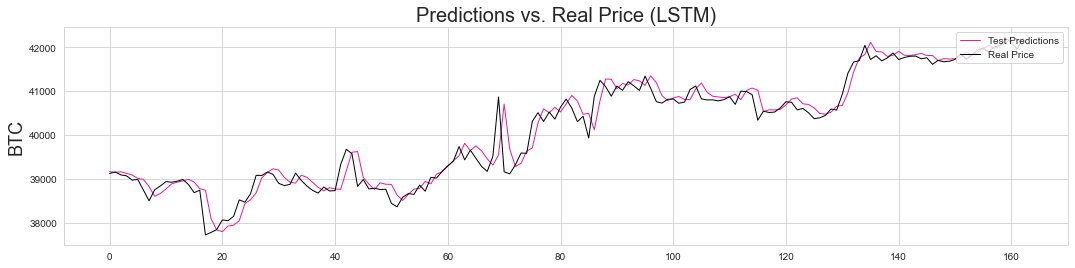

In [436]:
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (LSTM)", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_lstm_non_real, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")

# valid.loc[valid["Difference"] >= 0, 'diff_color'] = "#2BC97A"
# valid.loc[valid["Difference"] < 0, 'diff_color'] = "#C92B2B"
# plt.bar(valid.index, valid["Difference"], width=0.8, color=valid['diff_color'])

plt.show()

### 8.2. GRU

In [437]:
gru_imp_model = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# The gru_imp_model
gru_imp_model.add(GRU(12, return_sequences=True, input_shape=(None, X_train_final.shape[2]))) 
gru_imp_model.add(GRU(2))
gru_imp_model.add(Dense(1, activation='linear'))
 
# Hyperparameters
optimizer='adam'; loss='mean_squared_error'; epochs = 75; patience = 6;
parameter_list = ['epochs ' + str(epochs), 'batch_size ' + str(batch_size), 'patience ' + str(patience), 'optimizer ' + str(optimizer), 'loss ' + str(loss)]
print('Parameters: ' + str(parameter_list))

gru_imp_model.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

early_stop = EarlyStopping(monitor='val_loss', 
                           patience=patience, 
                           verbose=0)

gru_imp_model.summary()

timesteps: 5, features: 3, neurons: 15
Parameters: ['epochs 75', 'batch_size 128', 'patience 6', 'optimizer adam', 'loss mean_squared_error']
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, None, 12)          612       
                                                                 
 gru_11 (GRU)                (None, 2)                 96        
                                                                 
 dense_13 (Dense)            (None, 1)                 3         
                                                                 
Total params: 711
Trainable params: 711
Non-trainable params: 0
_________________________________________________________________


In [438]:
gru_imp_model_hist = gru_imp_model.fit(
                    X_train_final,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_final, y_val),
                    verbose=0
                )

2022-04-04 21:27:05.795596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:06.227573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:06.394526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:06.647538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:06.887901: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:08.670613: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:27:08.764769: I tensorflow/core/grappler/optimizers/cust

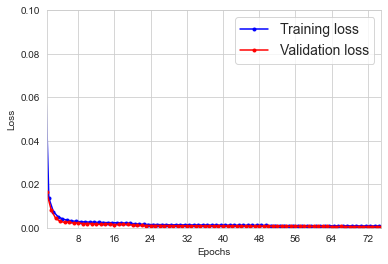

In [439]:
# Visualization of Training Loss and Validation Loss

plot_learning_curves(gru_imp_model_hist.history["loss"], gru_imp_model_hist.history["val_loss"])
plt.show()

In [440]:
mse_gru_imp_rnn = gru_imp_model.evaluate(X_val_final, y_val)
rmse_gru_imp_rnn = np.sqrt(mse_gru_imp_rnn)

30/30 [==============================] - 0s 9ms/step - loss: 5.6879e-04 - mean_squared_error: 5.6879e-04


In [441]:
y_pred_gru_non = gru_imp_model.predict(X_test_final)
mae_gru_imp_test = mean_absolute_error(y_test, y_pred_gru_non)

# MAE of real price
y_pred_gru_non_real = np.concatenate([y_pred_gru_non, y_pred_gru_non, y_pred_gru_non], axis=1)
y_pred_gru_non_real = scaler.inverse_transform(y_pred_gru_non_real)
y_pred_gru_non_real = y_pred_gru_non_real[:, 0]

mape_pred_gru_test = np.mean(np.mean(np.abs(y_test_real - y_pred_gru_non_real)/y_test_real)*100)
real_mae_pred_gru_test = mean_absolute_error(y_test_real, y_pred_gru_non_real)
evaluation_metrics.loc[3] = ['GRU - Non-Pipeline Dataset', 'Without tensorflow pipeline dataset. The rest is same', mse_gru_imp_rnn[0], rmse_gru_imp_rnn[0], mae_gru_imp_test, mape_pred_gru_test, real_mae_pred_gru_test]
evaluation_metrics

2022-04-04 21:28:00.834953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:00.901755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:00.986728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Model,Details,MSE,RMSE,MAE(Test),MAPE(Test),Real MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.046962,0.216708,0.087265,18.134498,1375.458725
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002134,0.046200,0.038006,1.499057,599.042514
2,LSTM - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.000418,0.020449,0.011832,0.467323,186.490561
3,GRU - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.000569,0.023849,0.012920,0.510579,203.637670
4,LSTM - 24 Sequence Length,"Timestep=50, without tensorflow pipeline datas...",0.000795,0.028201,0.015470,0.602620,243.836369


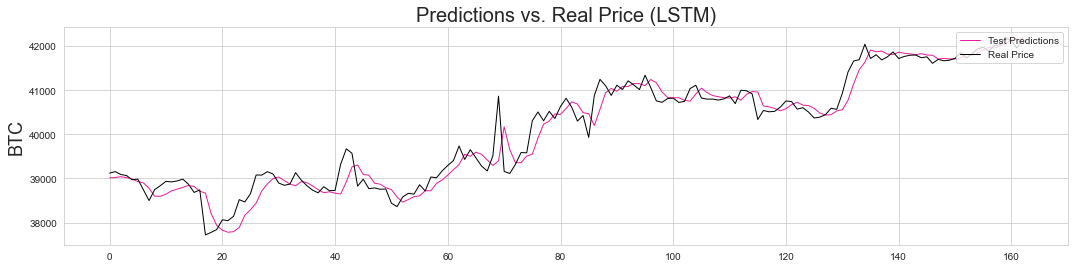

In [442]:
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (LSTM)", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_gru_non_real, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")

plt.show()

### 8.3. LSTM More Sequence Length

In [443]:
sequence_length = 50

def partition_dataset(sequence_length, data):
    x, y = [], []
    data_len = data.shape[0]

    for i in range(sequence_length, data_len):
        x.append(data[i-sequence_length:i, :]) 
        y.append(data[i, 0]) 
    
    x = np.array(x)
    y = np.array(y)
    return x, y

X_train_final_2, y_train_2 = partition_dataset(sequence_length, X_train_scaled)
X_val_final_2, y_val_2 = partition_dataset(sequence_length, X_val_scaled)
X_test_final_2, y_test_2 = partition_dataset(sequence_length, X_test_scaled)

    

In [444]:
lstm_24_seq = Sequential()

n_neurons = X_train_final.shape[1] * X_train_final.shape[2]
print('timesteps: ' + str(X_train_final.shape[1]) + ',' + ' features: ' + str(X_train_final.shape[2]) + ', neurons: ' + str(n_neurons))

# The lstm_24_seq
lstm_24_seq.add(LSTM(12, return_sequences=True, input_shape=(None, X_train_final.shape[2]))) 
lstm_24_seq.add(LSTM(5))
lstm_24_seq.add(Dense(1, activation='linear'))
 
# Hyperparameters
optimizer='adam'; loss='mean_squared_error'; epochs = 50; patience = 6;
parameter_list = ['epochs ' + str(epochs), 'batch_size ' + str(batch_size), 'patience ' + str(patience), 'optimizer ' + str(optimizer), 'loss ' + str(loss)]
print('Parameters: ' + str(parameter_list))

lstm_24_seq.compile(optimizer=optimizer, loss=loss, metrics=['mean_squared_error'])

lstm_24_seq.summary()

timesteps: 5, features: 3, neurons: 15
Parameters: ['epochs 50', 'batch_size 128', 'patience 6', 'optimizer adam', 'loss mean_squared_error']
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, None, 12)          768       
                                                                 
 lstm_17 (LSTM)              (None, 5)                 360       
                                                                 
 dense_14 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,134
Trainable params: 1,134
Non-trainable params: 0
_________________________________________________________________


In [445]:
lstm_24_seq_hist = lstm_24_seq.fit(
                    X_train_final_2,
                    y_train_2,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(X_val_final_2, y_val_2),
                    verbose=0
                )

2022-04-04 21:28:03.077294: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:03.292891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:03.444853: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:03.593133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:03.966365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:06.608555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:28:06.691876: I tensorflow/core/grappler/optimizers/cust

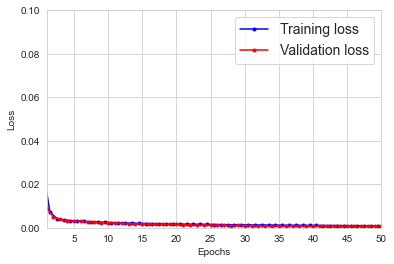

In [446]:
# Visualization of Training Loss and Validation Loss

plot_learning_curves(lstm_24_seq_hist.history["loss"], lstm_24_seq_hist.history["val_loss"])
plt.show()

In [447]:
mse_lstm_24_seq = lstm_24_seq.evaluate(X_val_final_2, y_val_2)
rmse_lstm_24_seq = np.sqrt(mse_lstm_24_seq)

29/29 [==============================] - 1s 23ms/step - loss: 6.2404e-04 - mean_squared_error: 6.2404e-04


In [448]:
y_test_2_real = y_test_2.reshape(-1, 1)
y_test_2_real = np.concatenate([y_test_2_real, y_test_2_real, y_test_2_real], axis=1)
y_test_2_real = scaler.inverse_transform(y_test_2_real)
y_test_2_real = y_test_2_real[:, 0]

In [449]:
y_pred_lstm_24 = lstm_24_seq.predict(X_test_final_2)
mae_lstm_24_seq = mean_absolute_error(y_test_2, y_pred_lstm_24)

# MAE of real price
y_pred_lstm_24_real = np.concatenate([y_pred_lstm_24, y_pred_lstm_24, y_pred_lstm_24], axis=1)
y_pred_lstm_24_real = scaler.inverse_transform(y_pred_lstm_24_real)
y_pred_lstm_24_real = y_pred_lstm_24_real[:, 0]

mape_pred_lstm_24 = np.mean(np.mean(np.abs(y_test_2_real - y_pred_lstm_24_real)/y_test_2_real)*100)
real_mae_pred_lstm_24 = mean_absolute_error(y_test_2_real, y_pred_lstm_24_real)
evaluation_metrics.loc[4] = ['LSTM - 24 Sequence Length', 'Timestep=50, without tensorflow pipeline dataset. The rest is same', mse_lstm_24_seq[0], rmse_lstm_24_seq[0], mae_lstm_24_seq, mape_pred_lstm_24, real_mae_pred_lstm_24]
evaluation_metrics

2022-04-04 21:29:55.380106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:29:55.515433: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-04 21:29:55.788725: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


,Model,Details,MSE,RMSE,MAE(Test),MAPE(Test),Real MAE(Test)
0,Naive Forecasting,Difference of Last Value in X val with y val,0.046962,0.216708,0.087265,18.134498,1375.458725
1,Base Deep RNN,"Neuron=5, Timestep=5, Epoch=35, Multi Layers",0.002134,0.046200,0.038006,1.499057,599.042514
2,LSTM - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.000418,0.020449,0.011832,0.467323,186.490561
3,GRU - Non-Pipeline Dataset,Without tensorflow pipeline dataset. The rest ...,0.000569,0.023849,0.012920,0.510579,203.637670
4,LSTM - 24 Sequence Length,"Timestep=50, without tensorflow pipeline datas...",0.000624,0.024981,0.017468,0.680573,275.320099


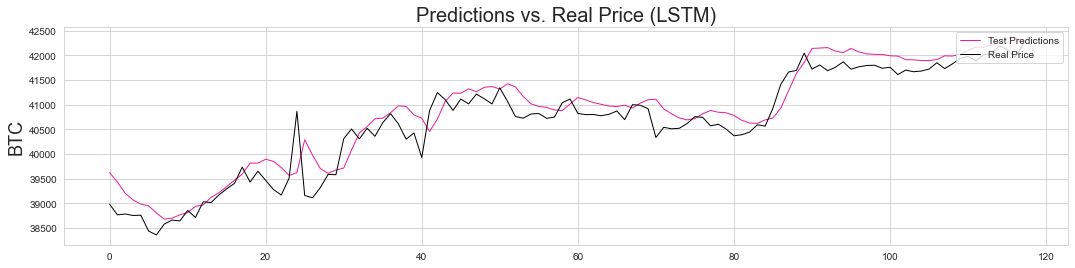

In [450]:
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price (LSTM)", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_lstm_24_real, color="#E91D9E", linewidth=1.0)
plt.plot(y_test_2_real, color="black", linewidth=1.0)
plt.legend(["Test Predictions", "Real Price"], loc="upper right")

plt.show()

## **10. Model Saving**

### 10.1. Choose The Best Model

In [451]:
y_dummy_price = []
for i in range(0, 45):
    y_dummy_price.append(43000)
    
y_pred_lstm_24_compare = y_pred_lstm_24_real.reshape(-1, 1)
y_pred_lstm_24_compare = np.insert(y_pred_lstm_24_compare, 0, np.array(y_dummy_price).reshape(-1,1), axis=0)

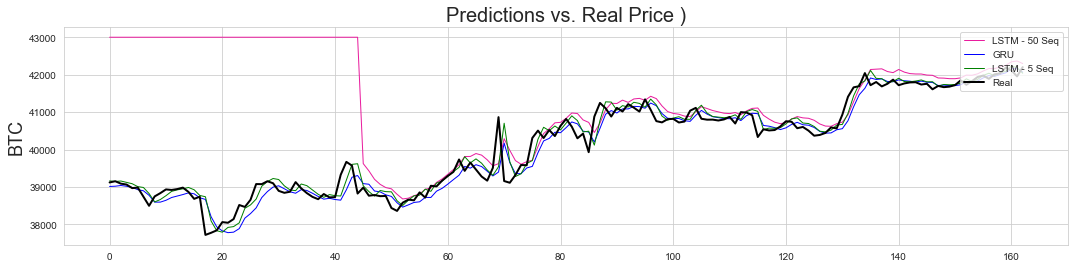

In [452]:
# plot prediction vs real price
fig, ax = plt.subplots(figsize=(18, 4), sharex=True)

plt.title("Predictions vs. Real Price )", fontsize=20)
plt.ylabel('BTC', fontsize=18)
plt.plot(y_pred_lstm_24_compare, color="#E91D9E", linewidth=1.0)
plt.plot(y_pred_gru_non_real, color="blue", linewidth=1.0)
plt.plot(y_pred_lstm_non_real, color="green", linewidth=1.0)
plt.plot(y_test_real, color="black", linewidth=2.0)
plt.legend(["LSTM - 50 Seq", "GRU", "LSTM - 5 Seq", "Real"], loc="upper right")
plt.show()

### 10.2. Scaling Pipeline

In [453]:
# with open("save_models/scale_pipe_3_features.pkl", "wb") as f:
#     pickle.dump(scaler, f)

### 10.3. Save Deep Learning Model

In [454]:
# # save model
# lstm_24_seq.save('save_models/lstm_24_3_features.h5')
# print('Model Saved!')

In [456]:
# # save model
# lstm_imp_model_2.save('save_models/lstm_5_3_features.h5')
# print('Model Saved!')

Model Saved!
